# Data Understanding/ Limitations

I gathered data from the NYSED system over 3 different school years containing data from 5 separate calendar years. I was able to stack the demographics as well as the dropout rates associated with each column to see demographic trends associated with dropout rates. In this notebook, I will clean the data sets to focus specifically with the percentage variables. I will also focus on the target variable, percentage dropout and bin it into areas of low-risk, medium-risk, and high-risk. Finally, at the end of the notebook I have added a dummy classifcation model as well as a first simple model.

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

In [173]:
df = pd.read_csv('3yrdemstack') #load in master for demographic set
df

,Unnamed: 0,Unnamed: 0.1,ENTITY_CD_x,ENTITY_NAME,YEAR_x,NUM_FREE_LUNCH,PER_FREE_LUNCH,NUM_REDUCED_LUNCH,PER_REDUCED_LUNCH,NUM_LEP,...,ENTITY_CD_y,YEAR_y,SUBGROUP_NAME,DROPOUT,PER_DROPOUT,EQUIV,PER_EQUIV,TOTALNON,PER_TOTALNON,TOTAL_ENROLLMENT_BASE
0,0,0,1,NYC Public Schools,2013,578885,60,64793,7,143664,...,1,2014,All Students,13812,05,1209,00,15021,05,301043
1,1,1,1,NYC Public Schools,2013,578885,60,64793,7,143664,...,1,2014,General Education,10466,04,931,00,11397,05,247315
2,2,2,1,NYC Public Schools,2013,578885,60,64793,7,143664,...,1,2014,Students with Disabilities,3346,06,278,01,3624,07,53728
3,3,3,1,NYC Public Schools,2013,578885,60,64793,7,143664,...,1,2013,All Students,15431,05,1573,01,17004,05,311619
4,4,4,1,NYC Public Schools,2013,578885,60,64793,7,143664,...,1,2013,General Education,12792,05,1310,01,14102,05,258745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154932,51335,51335,662300010043,EARLY COLLEGE HIGH SCHOOL,2014,586,79,48,7,74,...,662300010043,2014,General Education,s,s,s,s,s,s,621
154933,51336,51336,662300010043,EARLY COLLEGE HIGH SCHOOL,2014,586,79,48,7,74,...,662300010043,2014,Students with Disabilities,s,s,s,s,s,s,117
154934,51337,51337,321000011660,GRACE DODGE CAREER AND TECHNICAL HIGH SCHOOL,2015,120,69,0,0,46,...,321000011660,2015,All Students,61,35,3,02,64,37,174
154935,51338,51338,321000011660,GRACE DODGE CAREER AND TECHNICAL HIGH SCHOOL,2015,120,69,0,0,46,...,321000011660,2015,General Education,37,35,3,03,40,37,107


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154937 entries, 0 to 154936
Data columns (total 41 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             154937 non-null  int64  
 1   Unnamed: 0.1           154937 non-null  int64  
 2   ENTITY_CD_x            154937 non-null  int64  
 3   ENTITY_NAME            154937 non-null  object 
 4   YEAR_x                 154937 non-null  int64  
 5   NUM_FREE_LUNCH         154937 non-null  int64  
 6   PER_FREE_LUNCH         154937 non-null  int64  
 7   NUM_REDUCED_LUNCH      154937 non-null  int64  
 8   PER_REDUCED_LUNCH      154937 non-null  int64  
 9   NUM_LEP                154937 non-null  int64  
 10  PER_LEP                154937 non-null  int64  
 11  NUM_AM_IND             154937 non-null  int64  
 12  PER_AM_IND             154937 non-null  int64  
 13  NUM_BLACK              154937 non-null  int64  
 14  PER_BLACK              154937 non-nu

In [175]:
df


,Unnamed: 0,Unnamed: 0.1,ENTITY_CD_x,ENTITY_NAME,YEAR_x,NUM_FREE_LUNCH,PER_FREE_LUNCH,NUM_REDUCED_LUNCH,PER_REDUCED_LUNCH,NUM_LEP,...,ENTITY_CD_y,YEAR_y,SUBGROUP_NAME,DROPOUT,PER_DROPOUT,EQUIV,PER_EQUIV,TOTALNON,PER_TOTALNON,TOTAL_ENROLLMENT_BASE
0,0,0,1,NYC Public Schools,2013,578885,60,64793,7,143664,...,1,2014,All Students,13812,05,1209,00,15021,05,301043
1,1,1,1,NYC Public Schools,2013,578885,60,64793,7,143664,...,1,2014,General Education,10466,04,931,00,11397,05,247315
2,2,2,1,NYC Public Schools,2013,578885,60,64793,7,143664,...,1,2014,Students with Disabilities,3346,06,278,01,3624,07,53728
3,3,3,1,NYC Public Schools,2013,578885,60,64793,7,143664,...,1,2013,All Students,15431,05,1573,01,17004,05,311619
4,4,4,1,NYC Public Schools,2013,578885,60,64793,7,143664,...,1,2013,General Education,12792,05,1310,01,14102,05,258745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154932,51335,51335,662300010043,EARLY COLLEGE HIGH SCHOOL,2014,586,79,48,7,74,...,662300010043,2014,General Education,s,s,s,s,s,s,621
154933,51336,51336,662300010043,EARLY COLLEGE HIGH SCHOOL,2014,586,79,48,7,74,...,662300010043,2014,Students with Disabilities,s,s,s,s,s,s,117
154934,51337,51337,321000011660,GRACE DODGE CAREER AND TECHNICAL HIGH SCHOOL,2015,120,69,0,0,46,...,321000011660,2015,All Students,61,35,3,02,64,37,174
154935,51338,51338,321000011660,GRACE DODGE CAREER AND TECHNICAL HIGH SCHOOL,2015,120,69,0,0,46,...,321000011660,2015,General Education,37,35,3,03,40,37,107


# Cleaning Target Variable

In [176]:
df['PER_DROPOUT'].describe()

count     154401
unique       101
top            s
freq       71074
Name: PER_DROPOUT, dtype: object

In [177]:
df['PER_DROPOUT'].value_counts()

s      71074
01     15111
02     14626
03     11012
04      7767
       ...  
128        2
70         1
80         1
83         1
78         1
Name: PER_DROPOUT, Length: 101, dtype: int64

In [178]:
#code for sorting the values... input what you need inplace of this cell
df[df['PER_DROPOUT'] == 's']

,Unnamed: 0,Unnamed: 0.1,ENTITY_CD_x,ENTITY_NAME,YEAR_x,NUM_FREE_LUNCH,PER_FREE_LUNCH,NUM_REDUCED_LUNCH,PER_REDUCED_LUNCH,NUM_LEP,...,ENTITY_CD_y,YEAR_y,SUBGROUP_NAME,DROPOUT,PER_DROPOUT,EQUIV,PER_EQUIV,TOTALNON,PER_TOTALNON,TOTAL_ENROLLMENT_BASE
246,246,246,310300011485,"FIORELLO H LAGUARDIA HIGH SCHOOL OF MUSIC, ART...",2012,530,20,214,8,4,...,310300011485,2013,All Students,s,s,s,s,s,s,2694
247,247,247,310300011485,"FIORELLO H LAGUARDIA HIGH SCHOOL OF MUSIC, ART...",2012,530,20,214,8,4,...,310300011485,2013,General Education,s,s,s,s,s,s,2647
248,248,248,310300011485,"FIORELLO H LAGUARDIA HIGH SCHOOL OF MUSIC, ART...",2012,530,20,214,8,4,...,310300011485,2013,Students with Disabilities,s,s,s,s,s,s,47
249,249,249,310300011485,"FIORELLO H LAGUARDIA HIGH SCHOOL OF MUSIC, ART...",2012,530,20,214,8,4,...,310300011485,2014,All Students,s,s,s,s,s,s,2729
250,250,250,310300011485,"FIORELLO H LAGUARDIA HIGH SCHOOL OF MUSIC, ART...",2012,530,20,214,8,4,...,310300011485,2014,General Education,s,s,s,s,s,s,2663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154927,51330,51330,641001040001,HARTFORD CENTRAL SCHOOL,2014,125,27,29,6,0,...,641001040001,2014,General Education,s,s,s,s,s,s,136
154929,51332,51332,651201060003,SODUS HIGH SCHOOL,2014,91,26,29,8,6,...,651201060003,2014,General Education,s,s,s,s,s,s,299
154930,51333,51333,651201060003,SODUS HIGH SCHOOL,2014,91,26,29,8,6,...,651201060003,2014,Students with Disabilities,s,s,s,s,s,s,45
154932,51335,51335,662300010043,EARLY COLLEGE HIGH SCHOOL,2014,586,79,48,7,74,...,662300010043,2014,General Education,s,s,s,s,s,s,621


In [179]:
df1 = df[df['PER_DROPOUT'] != 's'] #dropping the targets that are labeled as s instead
df1['PER_DROPOUT'].value_counts()

01    15111
02    14626
03    11012
04     7767
00     7134
      ...  
72        2
78        1
70        1
83        1
80        1
Name: PER_DROPOUT, Length: 100, dtype: int64

In [181]:
df1.dropna()

,Unnamed: 0,Unnamed: 0.1,ENTITY_CD_x,ENTITY_NAME,YEAR_x,NUM_FREE_LUNCH,PER_FREE_LUNCH,NUM_REDUCED_LUNCH,PER_REDUCED_LUNCH,NUM_LEP,...,ENTITY_CD_y,YEAR_y,SUBGROUP_NAME,DROPOUT,PER_DROPOUT,EQUIV,PER_EQUIV,TOTALNON,PER_TOTALNON,TOTAL_ENROLLMENT_BASE
0,0,0,1,NYC Public Schools,2013,578885,60,64793,7,143664,...,1,2014,All Students,13812,05,1209,00,15021,05,301043
1,1,1,1,NYC Public Schools,2013,578885,60,64793,7,143664,...,1,2014,General Education,10466,04,931,00,11397,05,247315
2,2,2,1,NYC Public Schools,2013,578885,60,64793,7,143664,...,1,2014,Students with Disabilities,3346,06,278,01,3624,07,53728
3,3,3,1,NYC Public Schools,2013,578885,60,64793,7,143664,...,1,2013,All Students,15431,05,1573,01,17004,05,311619
4,4,4,1,NYC Public Schools,2013,578885,60,64793,7,143664,...,1,2013,General Education,12792,05,1310,01,14102,05,258745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154928,51331,51331,651201060003,SODUS HIGH SCHOOL,2014,91,26,29,8,6,...,651201060003,2014,All Students,7,02,0,00,7,02,344
154931,51334,51334,662300010043,EARLY COLLEGE HIGH SCHOOL,2014,586,79,48,7,74,...,662300010043,2014,All Students,15,02,14,02,29,04,738
154934,51337,51337,321000011660,GRACE DODGE CAREER AND TECHNICAL HIGH SCHOOL,2015,120,69,0,0,46,...,321000011660,2015,All Students,61,35,3,02,64,37,174
154935,51338,51338,321000011660,GRACE DODGE CAREER AND TECHNICAL HIGH SCHOOL,2015,120,69,0,0,46,...,321000011660,2015,General Education,37,35,3,03,40,37,107


In [182]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83863 entries, 0 to 154936
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             83863 non-null  int64  
 1   Unnamed: 0.1           83863 non-null  int64  
 2   ENTITY_CD_x            83863 non-null  int64  
 3   ENTITY_NAME            83863 non-null  object 
 4   YEAR_x                 83863 non-null  int64  
 5   NUM_FREE_LUNCH         83863 non-null  int64  
 6   PER_FREE_LUNCH         83863 non-null  int64  
 7   NUM_REDUCED_LUNCH      83863 non-null  int64  
 8   PER_REDUCED_LUNCH      83863 non-null  int64  
 9   NUM_LEP                83863 non-null  int64  
 10  PER_LEP                83863 non-null  int64  
 11  NUM_AM_IND             83863 non-null  int64  
 12  PER_AM_IND             83863 non-null  int64  
 13  NUM_BLACK              83863 non-null  int64  
 14  PER_BLACK              83863 non-null  int64  
 15  N

In [183]:
#focusing on my target variable that I will be using as a percentage val
df1['PER_DROPOUT'].dropna()


0         05
1         04
2         06
3         05
4         05
          ..
154928    02
154931    02
154934    35
154935    35
154936    36
Name: PER_DROPOUT, Length: 83327, dtype: object

In [184]:
print(df1[df1['PER_DROPOUT'].isnull()])

       Unnamed: 0  Unnamed: 0.1   ENTITY_CD_x  \
569           569           569  331700860879   
572           572           572  331700860879   
575           575           575  331700860879   
862           862           862  353100010072   
863           863           863  353100010072   
...           ...           ...           ...   
50691       50691         50691  321200011388   
50698       50698         50698  321200011388   
51362       51362         51362  580512030026   
51367       51367         51367  580512030026   
51372       51372         51372  580512030026   

                                            ENTITY_NAME  YEAR_x  \
569      ACHIEVEMENT FIRST CROWN HEIGHTS CHARTER SCHOOL    2012   
572      ACHIEVEMENT FIRST CROWN HEIGHTS CHARTER SCHOOL    2013   
575      ACHIEVEMENT FIRST CROWN HEIGHTS CHARTER SCHOOL    2014   
862                                  IS 72 ROCCO LAURIE    2012   
863                                  IS 72 ROCCO LAURIE    2012   
...      

In [185]:
df1['PER_DROPOUT'] = pd.to_numeric(df1['PER_DROPOUT'], errors='coerce')

<ipython-input-185-00742d92beb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['PER_DROPOUT'] = pd.to_numeric(df1['PER_DROPOUT'], errors='coerce')


In [186]:
df1 = df1.dropna(subset=['PER_DROPOUT'])

In [187]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83327 entries, 0 to 154936
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             83327 non-null  int64  
 1   Unnamed: 0.1           83327 non-null  int64  
 2   ENTITY_CD_x            83327 non-null  int64  
 3   ENTITY_NAME            83327 non-null  object 
 4   YEAR_x                 83327 non-null  int64  
 5   NUM_FREE_LUNCH         83327 non-null  int64  
 6   PER_FREE_LUNCH         83327 non-null  int64  
 7   NUM_REDUCED_LUNCH      83327 non-null  int64  
 8   PER_REDUCED_LUNCH      83327 non-null  int64  
 9   NUM_LEP                83327 non-null  int64  
 10  PER_LEP                83327 non-null  int64  
 11  NUM_AM_IND             83327 non-null  int64  
 12  PER_AM_IND             83327 non-null  int64  
 13  NUM_BLACK              83327 non-null  int64  
 14  PER_BLACK              83327 non-null  int64  
 15  N

In [188]:
df1['PER_DROPOUT'] = df1['PER_DROPOUT'].astype(int)

## Binning Target Variable

In [189]:
df1['PER_DROPOUT'].describe()

count    83327.000000
mean         5.938663
std         22.980267
min          0.000000
25%          1.000000
50%          3.000000
75%          6.000000
max       1400.000000
Name: PER_DROPOUT, dtype: float64

In [190]:
#Creating Risk Level Bin
#While risk level is spaced out on different tiers, I wanted to make it representative of the data that we have here

df1['RiskLevel'] = pd.cut(x=df1['PER_DROPOUT'],
                     bins=[0, 3, 8, 100],
                     labels=['Low-Risk', 'Mid-Risk', 'High-Risk'])



In [191]:
df1

,Unnamed: 0,Unnamed: 0.1,ENTITY_CD_x,ENTITY_NAME,YEAR_x,NUM_FREE_LUNCH,PER_FREE_LUNCH,NUM_REDUCED_LUNCH,PER_REDUCED_LUNCH,NUM_LEP,...,YEAR_y,SUBGROUP_NAME,DROPOUT,PER_DROPOUT,EQUIV,PER_EQUIV,TOTALNON,PER_TOTALNON,TOTAL_ENROLLMENT_BASE,RiskLevel
0,0,0,1,NYC Public Schools,2013,578885,60,64793,7,143664,...,2014,All Students,13812,5,1209,00,15021,05,301043,Mid-Risk
1,1,1,1,NYC Public Schools,2013,578885,60,64793,7,143664,...,2014,General Education,10466,4,931,00,11397,05,247315,Mid-Risk
2,2,2,1,NYC Public Schools,2013,578885,60,64793,7,143664,...,2014,Students with Disabilities,3346,6,278,01,3624,07,53728,Mid-Risk
3,3,3,1,NYC Public Schools,2013,578885,60,64793,7,143664,...,2013,All Students,15431,5,1573,01,17004,05,311619,Mid-Risk
4,4,4,1,NYC Public Schools,2013,578885,60,64793,7,143664,...,2013,General Education,12792,5,1310,01,14102,05,258745,Mid-Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154928,51331,51331,651201060003,SODUS HIGH SCHOOL,2014,91,26,29,8,6,...,2014,All Students,7,2,0,00,7,02,344,Low-Risk
154931,51334,51334,662300010043,EARLY COLLEGE HIGH SCHOOL,2014,586,79,48,7,74,...,2014,All Students,15,2,14,02,29,04,738,Low-Risk
154934,51337,51337,321000011660,GRACE DODGE CAREER AND TECHNICAL HIGH SCHOOL,2015,120,69,0,0,46,...,2015,All Students,61,35,3,02,64,37,174,High-Risk
154935,51338,51338,321000011660,GRACE DODGE CAREER AND TECHNICAL HIGH SCHOOL,2015,120,69,0,0,46,...,2015,General Education,37,35,3,03,40,37,107,High-Risk


In [192]:
df1['RiskLevel'].value_counts() #reassess for class imbalance

Low-Risk     40749
Mid-Risk     23623
High-Risk    11693
Name: RiskLevel, dtype: int64

In [193]:
#code for droppin non useful columns
df1 =df1.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'ENTITY_CD_x', 'YEAR_y'])


In [194]:
df1

,ENTITY_NAME,YEAR_x,NUM_FREE_LUNCH,PER_FREE_LUNCH,NUM_REDUCED_LUNCH,PER_REDUCED_LUNCH,NUM_LEP,PER_LEP,NUM_AM_IND,PER_AM_IND,...,ENTITY_CD_y,SUBGROUP_NAME,DROPOUT,PER_DROPOUT,EQUIV,PER_EQUIV,TOTALNON,PER_TOTALNON,TOTAL_ENROLLMENT_BASE,RiskLevel
0,NYC Public Schools,2013,578885,60,64793,7,143664,15,6466,1,...,1,All Students,13812,5,1209,00,15021,05,301043,Mid-Risk
1,NYC Public Schools,2013,578885,60,64793,7,143664,15,6466,1,...,1,General Education,10466,4,931,00,11397,05,247315,Mid-Risk
2,NYC Public Schools,2013,578885,60,64793,7,143664,15,6466,1,...,1,Students with Disabilities,3346,6,278,01,3624,07,53728,Mid-Risk
3,NYC Public Schools,2013,578885,60,64793,7,143664,15,6466,1,...,1,All Students,15431,5,1573,01,17004,05,311619,Mid-Risk
4,NYC Public Schools,2013,578885,60,64793,7,143664,15,6466,1,...,1,General Education,12792,5,1310,01,14102,05,258745,Mid-Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154928,SODUS HIGH SCHOOL,2014,91,26,29,8,6,2,1,0,...,651201060003,All Students,7,2,0,00,7,02,344,Low-Risk
154931,EARLY COLLEGE HIGH SCHOOL,2014,586,79,48,7,74,10,2,0,...,662300010043,All Students,15,2,14,02,29,04,738,Low-Risk
154934,GRACE DODGE CAREER AND TECHNICAL HIGH SCHOOL,2015,120,69,0,0,46,26,0,0,...,321000011660,All Students,61,35,3,02,64,37,174,High-Risk
154935,GRACE DODGE CAREER AND TECHNICAL HIGH SCHOOL,2015,120,69,0,0,46,26,0,0,...,321000011660,General Education,37,35,3,03,40,37,107,High-Risk


In [195]:
#new data frame for columns I want to keep
columns = ['ENTITY_NAME', 'PER_FREE_LUNCH', 'PER_LEP', 'PER_AM_IND', 'PER_BLACK', 'PER_HISP', 'PER_ASIAN', 'PER_WHITE', 'PER_Multi', 'PER_FEMALE', 'PER_MALE', 'PER_ECDIS', 'PER_EQUIV', 'PER_TOTALNON', 'RiskLevel']

df2 = df1[columns]

In [134]:
#np.nan_to_num(df2) 

In [196]:
df2

,ENTITY_NAME,PER_FREE_LUNCH,PER_LEP,PER_AM_IND,PER_BLACK,PER_HISP,PER_ASIAN,PER_WHITE,PER_Multi,PER_FEMALE,PER_MALE,PER_ECDIS,PER_EQUIV,PER_TOTALNON,RiskLevel
0,NYC Public Schools,60,15,1,27,40,16,15,1,49.0,51.0,81.0,00,05,Mid-Risk
1,NYC Public Schools,60,15,1,27,40,16,15,1,49.0,51.0,81.0,00,05,Mid-Risk
2,NYC Public Schools,60,15,1,27,40,16,15,1,49.0,51.0,81.0,01,07,Mid-Risk
3,NYC Public Schools,60,15,1,27,40,16,15,1,49.0,51.0,81.0,01,05,Mid-Risk
4,NYC Public Schools,60,15,1,27,40,16,15,1,49.0,51.0,81.0,01,05,Mid-Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154928,SODUS HIGH SCHOOL,26,2,0,14,12,0,70,4,49.0,51.0,45.0,00,02,Low-Risk
154931,EARLY COLLEGE HIGH SCHOOL,79,10,0,34,49,4,11,1,47.0,53.0,87.0,02,04,Low-Risk
154934,GRACE DODGE CAREER AND TECHNICAL HIGH SCHOOL,69,26,0,20,76,2,2,0,56.0,44.0,69.0,02,37,High-Risk
154935,GRACE DODGE CAREER AND TECHNICAL HIGH SCHOOL,69,26,0,20,76,2,2,0,56.0,44.0,69.0,03,37,High-Risk


# Dealing with Null Rows

In [197]:
print(df2[df2.isnull()])

       ENTITY_NAME  PER_FREE_LUNCH  PER_LEP  PER_AM_IND  PER_BLACK  PER_HISP  \
0              NaN             NaN      NaN         NaN        NaN       NaN   
1              NaN             NaN      NaN         NaN        NaN       NaN   
2              NaN             NaN      NaN         NaN        NaN       NaN   
3              NaN             NaN      NaN         NaN        NaN       NaN   
4              NaN             NaN      NaN         NaN        NaN       NaN   
...            ...             ...      ...         ...        ...       ...   
154928         NaN             NaN      NaN         NaN        NaN       NaN   
154931         NaN             NaN      NaN         NaN        NaN       NaN   
154934         NaN             NaN      NaN         NaN        NaN       NaN   
154935         NaN             NaN      NaN         NaN        NaN       NaN   
154936         NaN             NaN      NaN         NaN        NaN       NaN   

        PER_ASIAN  PER_WHITE  PER_Multi

In [198]:
for col in df2.columns:
    # Select the column by name and get count of unique values in it
    count = df2[col].isna().sum()
    print(f'Count of na values in Column "{col}" is: {count}')

Count of na values in Column "ENTITY_NAME" is: 0
Count of na values in Column "PER_FREE_LUNCH" is: 0
Count of na values in Column "PER_LEP" is: 0
Count of na values in Column "PER_AM_IND" is: 0
Count of na values in Column "PER_BLACK" is: 0
Count of na values in Column "PER_HISP" is: 0
Count of na values in Column "PER_ASIAN" is: 0
Count of na values in Column "PER_WHITE" is: 0
Count of na values in Column "PER_Multi" is: 0
Count of na values in Column "PER_FEMALE" is: 11525
Count of na values in Column "PER_MALE" is: 11525
Count of na values in Column "PER_ECDIS" is: 11525
Count of na values in Column "PER_EQUIV" is: 0
Count of na values in Column "PER_TOTALNON" is: 0
Count of na values in Column "RiskLevel" is: 7262


In [166]:
#for row in df2.rows:
    # Select the column by name and get count of unique values in it
    #count = df2[row].nunique()
    #print(f'Count of Unique values in Column "{col}" is: {count}')

In [145]:
#anywhere that there is a missing value then we can drop from data frame and only keep obs that are complete



,ENTITY_NAME,PER_FREE_LUNCH,PER_LEP,PER_AM_IND,PER_BLACK,PER_HISP,PER_ASIAN,PER_WHITE,PER_Multi,PER_FEMALE,PER_MALE,PER_ECDIS,PER_EQUIV,PER_TOTALNON,RiskLevel
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154928,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
154931,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
154934,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
154935,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [199]:
subset = df2[df2.isnull().any(axis=1)]

In [200]:
df2.dropna(axis=0, how='any',thresh=None, subset=None, inplace=True)

<ipython-input-200-7ad13926227d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(axis=0, how='any',thresh=None, subset=None, inplace=True)


In [201]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66198 entries, 0 to 154936
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ENTITY_NAME     66198 non-null  object  
 1   PER_FREE_LUNCH  66198 non-null  int64   
 2   PER_LEP         66198 non-null  int64   
 3   PER_AM_IND      66198 non-null  int64   
 4   PER_BLACK       66198 non-null  int64   
 5   PER_HISP        66198 non-null  int64   
 6   PER_ASIAN       66198 non-null  int64   
 7   PER_WHITE       66198 non-null  int64   
 8   PER_Multi       66198 non-null  int64   
 9   PER_FEMALE      66198 non-null  float64 
 10  PER_MALE        66198 non-null  float64 
 11  PER_ECDIS       66198 non-null  float64 
 12  PER_EQUIV       66198 non-null  object  
 13  PER_TOTALNON    66198 non-null  object  
 14  RiskLevel       66198 non-null  category
dtypes: category(1), float64(3), int64(8), object(3)
memory usage: 7.6+ MB


In [204]:
df2.to_csv(path_or_buf = "master_df", header=True)

# Dummy Classifier/Baseline



Since I am implementing a classification model, I will be using a Dummy classifier as my baseline model.

In [206]:

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score


df = pd.read_csv('master_df')


In [208]:
#separating interested columns out into new dataframe
demographics = ['PER_FREE_LUNCH', 'PER_LEP', 'PER_AM_IND', 'PER_BLACK', 'PER_HISP', 'PER_ASIAN', 'PER_WHITE', 'PER_Multi', 'PER_FEMALE', 'PER_MALE', 'PER_ECDIS', 'RiskLevel']

df_dem = df[demographics]


In [209]:
# Performing test-train split
y = df_dem['RiskLevel']
X = df_dem.drop(columns = ['RiskLevel'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)



In [210]:
# Performing dummy classification
dem_clf = DummyClassifier(strategy="most_frequent")
dem_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent');

In [211]:
# Scoring dummy classifier

print(f'Our dummy classifier has a precision of: \
      {round(precision_score(y_train, dem_clf.predict(X_train), average = "weighted", zero_division=0),3)*100}%')

Our dummy classifier has a precision of:       28.599999999999998%


# One Hot Encode and Decision Tree

Undoubtedly, we must one hot encode, so that we have binary values. After we one hot encode, we can see which features are the most important to keep in our simple logistic regression with our decision tree. 

In [212]:
# Import relevant libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [213]:
# Encode the X_train and X_test dataframes
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

# Encode train set
X_train_ohe1 = ohe.fit_transform(X_train)
X_train_ohe = pd.DataFrame(X_train_ohe1)
X_train_ohe.columns = ohe.get_feature_names(X_train.columns)

# Encode train set
X_test_ohe1 = ohe.transform(X_test)
X_test_ohe = pd.DataFrame(X_test_ohe1)
X_test_ohe.columns = ohe.get_feature_names(X_test.columns)

In [214]:
# Decision tree

clf = DecisionTreeClassifier(criterion='entropy', max_depth = 3)

clf.fit(X_train_ohe, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

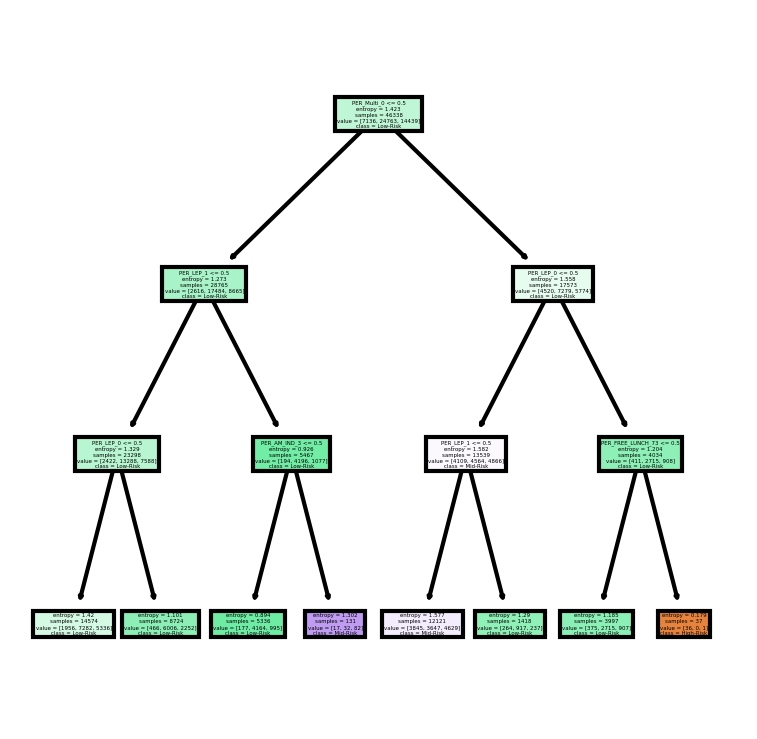

In [217]:


fig, axes = plot.subplots(nrows = 1,ncols =1 , figsize = (3,3), dpi=300)
plot_tree(clf,
               feature_names = X_train_ohe.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plot.show()

## Decision Tree Results

#### Top 4 Features (all within the class low-risk)

- Percentage of Multiracial Students
- Percentage of Limited English Proficient Students
- Percentage of American Indian or Alaskan Native Students
- Percentage of Students Eligible for Free Lunch


# First Simple Model

In [218]:
from sklearn.linear_model import LogisticRegression

In [220]:
# Column selection
log_cols1 = ['PER_Multi', 'PER_FREE_LUNCH', 'PER_LEP', 'PER_AM_IND']

logx_train = X_train[log_cols1]
logx_test = X_test[log_cols1]

In [221]:
# Encoding new frames
logx_train_ohe1 = ohe.fit_transform(logx_train)
logx_train_ohe = pd.DataFrame(logx_train_ohe1)
logx_train_ohe.columns = ohe.get_feature_names(logx_train.columns)

logx_test_ohe1 = ohe.transform(logx_test)
logx_test_ohe = pd.DataFrame(logx_test_ohe1)
logx_test_ohe.columns = ohe.get_feature_names(logx_test.columns)

In [222]:
# Instantiate and perform logistic regression

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

logreg.fit(logx_train_ohe, y_train)

print(f"Training precision: \
      {round(precision_score(y_train, logreg.predict(logx_train_ohe), average='weighted', zero_division=0),4)*100}%")
print(f"Test precision: \
      {round(precision_score(y_test, logreg.predict(logx_test_ohe), average='weighted', zero_division=0),4)*100}%")


Training precision:       62.56%
Test precision:       61.83%
